In [10]:
import numpy as np
import pandas as pd
import quandl as qd
import matplotlib.pyplot as plt
from matplotlib import style
import math
import sklearn
from sklearn import preprocessing, cross_validation, svm
import statistics as stat 

In [3]:
df=pd.read_csv('population.csv',delimiter=';')
print (df)

    Year  Population
0   2007     9182927
1   2008     9256347
2   2009     9340682
3   2010     9415570
4   2011     9482855
5   2012     9555893
6   2013     9644864
7   2014     9747355
8   2015     9851017
9   2016     9995153
10  2017    10120242
11  2018    10230185
12  2006     9113257
13  2005     9047752
14  2004     9011392
15  2003     8975670
16  2002     8940788
17  2001     8909128
18  2000     8882792
19  1999     8861426


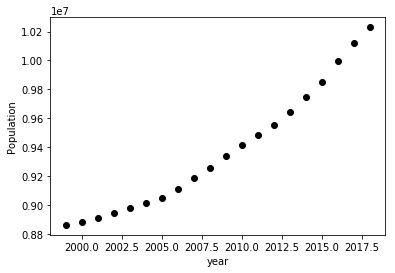

[[-0.89659937]
 [ 1.33493684]
 [-1.3747857 ]
 [ 0.69735507]
 [ 0.37856418]
 [ 1.1755414 ]
 [ 1.49433229]
 [ 0.85675051]
 [-0.57780848]
 [-1.05599482]
 [ 1.01614595]
 [-0.41841304]
 [-1.53418115]
 [-1.21539026]
 [-0.09962215]
 [ 0.21916874]]


In [17]:
X = np.array(df.drop(['Population'], 1),dtype=float)
y = np.array(df['Population'])
plt.scatter(X,y,color='k')
plt.xlabel('year')
plt.ylabel('Population')
plt.show()
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
X_train=featureNormalize(X_train)
# print(X_train)

In [31]:
# b=np.ones(X.shape[0])
X_train=np.c_[np.ones(X_train.shape[0]),X_train]
# print(b)
print(X_train.shape)

(16, 2)


In [33]:
theta=np.array(np.zeros(X_train.shape[1]))
iterations=1000
alpha=0.1
print(theta.shape)
theta=gradientDescent(X_train,y_train,alpha,theta,iterations)

(2,)
35907267603580.125
29085653515165.992
23560146103550.555
19084485100142.043
15459199687381.146
12522718503044.826
10144168743732.402
8217543438689.342
6656976941604.461
5392918078965.707
4369030400228.3184
3539681380451.032
2867908674431.4316
2323772782555.5537
1883022710136.0928
1526015151476.3308
1236839028961.9233
1002606369725.2527
812877915743.55
659197868018.3704
534717029360.97485
433887550048.4851
352215671805.3678
286061450428.4428
232476531113.1339
189072746467.73334
153915680904.9591
125438457799.11215
102371907083.37584
83688001003.6294
68554037079.034386
56295526300.11286
46366132569.186516
38323323647.13583
31808648420.274998
26531761486.51758
22257483070.174107
18795317552.935776
15990963483.972927
13719436688.113026
11879499983.466667
10389151252.702885
9181968780.784235
8204150978.530059
7412118558.704329
6770572298.645433
6250919827.997778
5830001326.773071
5489057340.781148
5212892712.1277
4989199362.918407
4808007750.058855
4661242543.642586
4542362726.445376
4

In [21]:
def computeCost(X,y,theta):
    m=y.shape[0]
    j=(1/(2*m))*np.sum(np.square(np.dot((theta.T),(X.T))-(y.T)))
    return j

In [20]:
def gradientDescent(X,y,alpha,theta,num_iters):
    m=y.shape[0]
    for i in range(num_iters):
        theta=theta-(((alpha)*np.dot((np.dot((theta.T),(X.T))-(y.T)),X))/m).T
#         print (theta)
        print (computeCost(X,y,theta))    
    return theta

In [16]:
def featureNormalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X=(X-mean)/std
    print (X)
    return X
    

In [34]:
print (theta)

[9404650.06249999  450014.29623925]
